In [1]:
!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane.jpg -O plane.jpg

--2024-07-24 15:47:07--  https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane.jpg
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane.jpg [following]
--2024-07-24 15:47:07--  https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4937732 (4.7M) [image/jpeg]
Saving to: 'plane.jpg'

plane.jpg           100%[===================>]   4.71M  23.5MB/s    in 0.2s    

2024-07-24 15:47:07 (23.5 MB/s)

In [2]:
!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane_256x256.jpg -O plane_256x256.jpg

--2024-07-24 15:47:08--  https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane_256x256.jpg
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane_256x256.jpg [following]
--2024-07-24 15:47:08--  https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane_256x256.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22974 (22K) [image/jpeg]
Saving to: 'plane_256x256.jpg'

plane_256x256.jpg   100%[===================>]  22.44K  --.-KB/s    in 0.005s  

20

In [3]:
# 이미지 파일 열기
import cv2
img = cv2.imread('plane_256x256.jpg', 0) # 아무 지정없이 열면 BGR로 열림
img.shape

(256, 256)

In [4]:
img_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE) # 그레이스케일로 열기

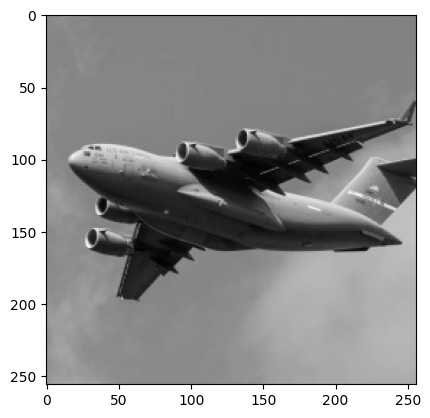

In [5]:
# 이미지 시각화
import matplotlib.pyplot as plt
plt.imshow(img_gray, cmap='gray')
plt.show()

# 적응적 이진화

In [6]:
# 기본값 설정
max_output_value = 255 # 픽셀 강도 0~255
neighborhood_size = 3 # 평균에 사용되는 이웃 크기
subtract_from_mean = 10 # 평균에서 빼는 값. 크면 임계값이 낮아져서 이미지가 더 하얗게 됨

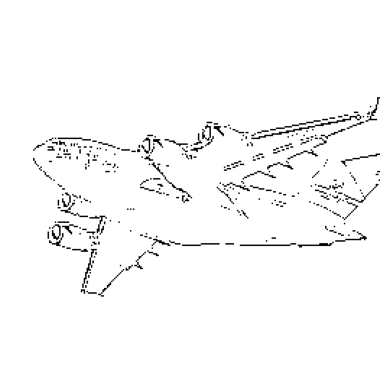

In [7]:
# 가우스 평균 사용
img_binarized = cv2.adaptiveThreshold(img_gray,
                                      max_output_value,
                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY,
                                      neighborhood_size,
                                      subtract_from_mean)
plt.imshow(img_binarized, cmap='gray')
plt.axis('off')
plt.show()

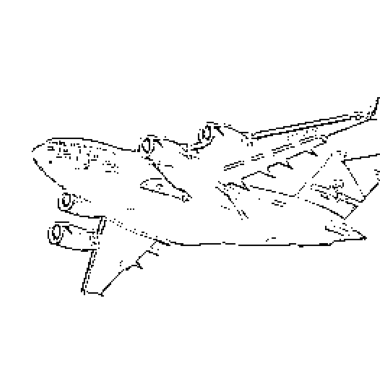

In [8]:
# cv2.ADAPTIVE_THRESH_MEAN_C를 적용
image_mean_threshold = cv2.adaptiveThreshold(img_gray,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

# 이미지 출력
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

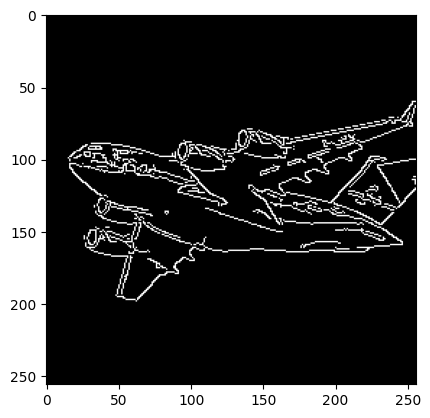

In [9]:
# 캐니 경계선 감지기 적용
img_canny = cv2.Canny(img_gray, 50, 150)
plt.imshow(img_canny, cmap="gray")
plt.show()

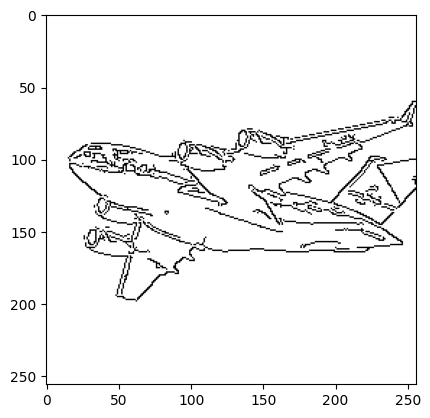

In [10]:
# not 연산 적용

bitwise_not = cv2.bitwise_not(img_canny)
plt.imshow(bitwise_not, cmap="gray")
plt.show()

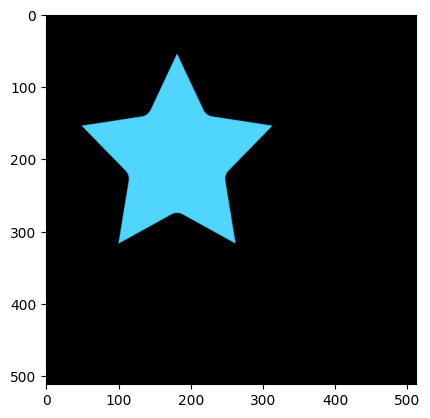

In [11]:
# 별 이미지를 열어서 캐니를 이용하여 겨계선을 감지하시오

# 컬러로 이미지 읽기
star_img = cv2.imread('star_img.png', 1)

# 기본 이미지 출력
plt.imshow(star_img, cmap='gray')
plt.show()

In [12]:
# 흑백으로 변경
star_gray = cv2.cvtColor(star_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(star_gray, cmap='gray')
plt.show()

NameError: name 'star_bgr' is not defined

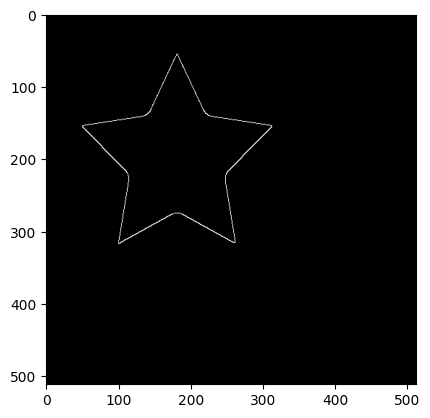

In [ ]:
# 캐니 경계선 감지 적용 (이미지의 윤곽선 검출 - Canny 이용)
import numpy as np
star_canny = cv2.Canny(star_gray, 50, 250)

plt.imshow(star_canny, cmap='gray')
plt.show()

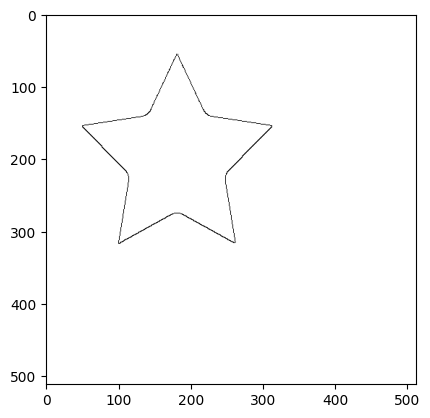

In [ ]:
# 반전해서 검출 - bitwise_not 사용
edge_reverse = cv2.bitwise_not(edge)

plt.imshow(edge_reverse, cmap='gray')
plt.show()

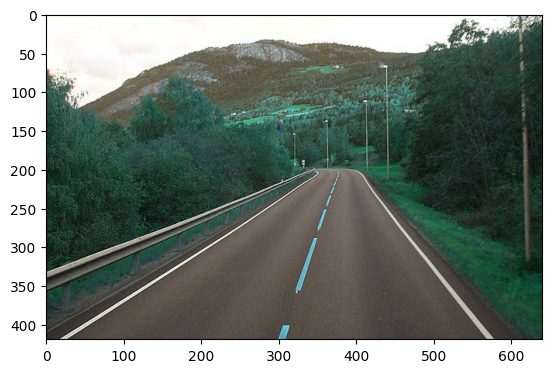

In [13]:
# load 이미지 읽기
load = cv2.imread('load.jpg')
plt.imshow(load)
plt.show()

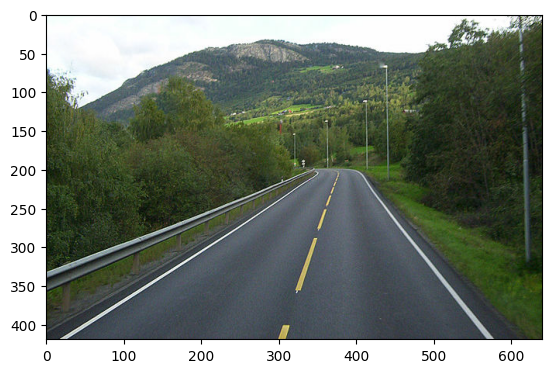

In [14]:
# RGB로 변환
road_rgb = cv2.cvtColor(load, cv2.COLOR_BGR2RGB)
plt.imshow(road_rgb)
plt.show()

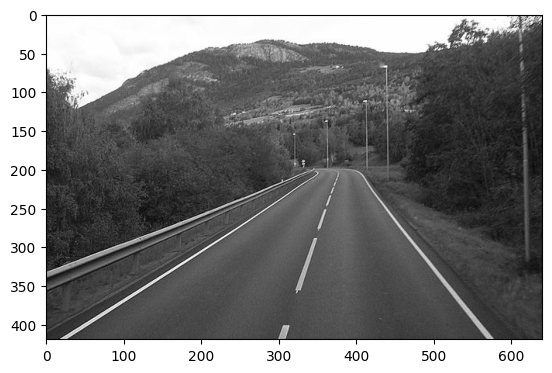

In [15]:
# 흑백으로 변환
road_gray = cv2.cvtColor(load, cv2.COLOR_BGR2GRAY)
plt.imshow(road_gray, cmap='gray')
plt.show()

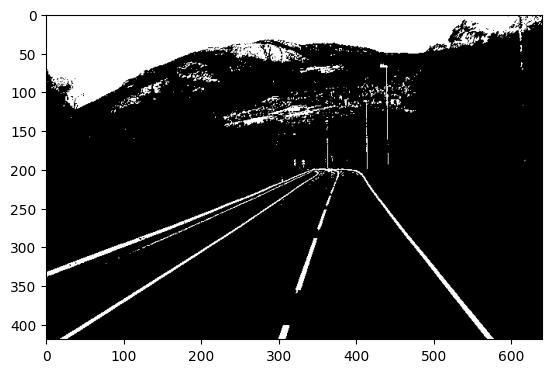

In [20]:
# 이미지 이진화
ret, road_binary = cv2.threshold(road_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(road_binary, cmap='gray')
plt.show()

In [21]:
# 외괵선 계산
contours, hierarchy = cv2.findContours(road_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours:', len(contours))

Number of contours: 657


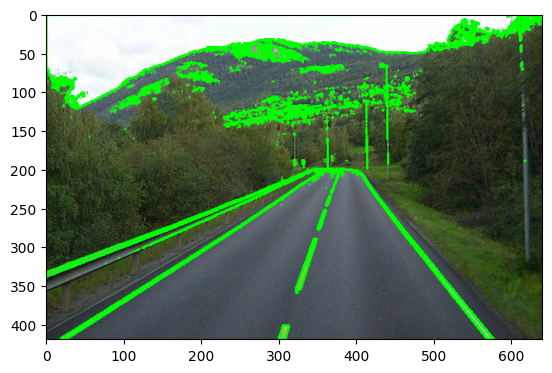

In [23]:
# 외곽선 그리기
road_contours = cv2.drawContours(road_rgb, contours, -1, (0, 255, 0), 2)

plt.imshow(road_contours)
plt.show()